# Requirements

numpy

pandas


Scikit-Learn

H2O.ai

matplotlib

seaborn

polars

In [30]:
import pandas as pd
pd.options.display.max_columns = None

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame
# pip install polars pyarrow



In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

In [3]:
train.head(2)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1


In [4]:
test.head(2)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No


In [5]:
train.shape

(140700, 20)

In [6]:
test.shape

(93800, 19)

# Basic Statistics of data

In [7]:
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

Percentage of null-values Columnwise

In [9]:
null_percentages = train.isnull().mean() * 100

In [10]:
null_percentages

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

In [11]:
train.nunique()

id                                       140700
Name                                        422
Gender                                        2
Age                                          43
City                                         98
Working Professional or Student               2
Profession                                   64
Academic Pressure                             5
Work Pressure                                 5
CGPA                                        331
Study Satisfaction                            5
Job Satisfaction                              5
Sleep Duration                               36
Dietary Habits                               23
Degree                                      115
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
dtype: int64

In [12]:
train['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [13]:
train['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [14]:
train['Work/Study Hours'].unique()

array([ 1.,  7.,  3., 10.,  9.,  6.,  8.,  2.,  0.,  5., 12.,  4., 11.])

# Handling the Nan Values

In [19]:
columns_to_drop = ['id','Name', 'City', 'Profession', 'Degree']
train.drop(columns=[col for col in columns_to_drop if col in train.columns], axis=1, inplace=True)
test.drop(columns=[col for col in columns_to_drop if col in test.columns], axis=1, inplace=True)

train.columns = train.columns.str.replace('?', '', regex=False)
test.columns = test.columns.str.replace('?', '', regex=False)

In [20]:
from sklearn.impute import SimpleImputer

numerical_columns = ['Age', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
                     'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 
                     'Academic Pressure']
categorical_columns = [col for col in train.columns if col not in numerical_columns and col != 'Depression']

#imputer = IterativeImputer(random_state=42)
#train_num = pd.DataFrame(imputer.fit_transform(train[numerical_columns]), columns=numerical_columns)
#test_num = pd.DataFrame(imputer.transform(test[numerical_columns]), columns=numerical_columns)

imputer = SimpleImputer(strategy='mean')
train_num = pd.DataFrame(imputer.fit_transform(train[numerical_columns]), columns=numerical_columns)
test_num = pd.DataFrame(imputer.transform(test[numerical_columns]), columns=numerical_columns)

train[numerical_columns] = train_num
test[numerical_columns] = test_num

sleep_duration_mapping = {
    'Less than 5 hours': 'Less than 5 hours', '5-6 hours': '5-6 hours', 
    '6-7 hours': '6-7 hours', '7-8 hours': '7-8 hours', 'More than 8 hours': 'More than 8 hours',
    '3-4 hours': 'Less than 5 hours', '4-5 hours': 'Less than 5 hours', 
    '4-6 hours': '5-6 hours', '2-3 hours': 'Less than 5 hours', 
    '6-8 hours': '7-8 hours', '8-9 hours': 'More than 8 hours', 
    '10-11 hours': 'More than 8 hours', '9-11 hours': 'More than 8 hours',
    'No': 'Unknown', 'Sleep_Duration': 'Unknown', 'Unhealthy': 'Unknown',
    '1-6 hours': 'Unknown', '10-6 hours': 'Unknown', 'than 5 hours': 'Less than 5 hours',
    '1-2 hours': 'Less than 5 hours', '1-3 hours': 'Less than 5 hours',
    'Work_Study_Hours': 'Unknown', 'Indore': 'Unknown', 'Pune': 'Unknown'
}

dietary_mapping = {
    'Moderate': 'Moderate', 'Healthy': 'Healthy', 'Unhealthy': 'Unhealthy', 'Yes': 'Moderate',
    'No': 'Moderate', 'More Healthy': 'Healthy', 'Less than Healthy': 'Moderate', 'No Healthy': 'Unhealthy',
    'Less Healthy': 'Moderate','Hormonal': 'Unhealthy','Pratham': 'Unhealthy','Gender': 'Unhealthy',
    '3': 'Unhealthy','1.0': 'Unhealthy','Electrician': 'Unhealthy', 'Mihir': 'Unhealthy',  'M.Tech': 'Unhealthy',
    'Vegas': 'Unhealthy','Male': 'Unhealthy'
}


train['Sleep Duration'] = train['Sleep Duration'].map(sleep_duration_mapping).fillna('Unknown')
test['Sleep Duration'] = test['Sleep Duration'].map(sleep_duration_mapping).fillna('Unknown')

train['Dietary Habits'] = train['Dietary Habits'].map(dietary_mapping).fillna('Unknown')
test['Dietary Habits'] = test['Dietary Habits'].map(dietary_mapping).fillna('Unknown')

In [21]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    label_encoders[col] = le

In [22]:
train.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,1,3.142273,5.000000,7.658636,2.94494,2.000000,4,0,0,1.0,2.0,0,0
1,1,26.0,1,3.142273,4.000000,7.658636,2.94494,3.000000,3,2,1,7.0,3.0,0,1
2,1,33.0,0,5.000000,2.998998,8.970000,2.00000,2.974404,0,0,1,3.0,1.0,0,1
3,1,22.0,1,3.142273,5.000000,7.658636,2.94494,1.000000,3,1,1,10.0,1.0,1,1
4,0,30.0,1,3.142273,1.000000,7.658636,2.94494,1.000000,0,2,1,9.0,4.0,1,0


In [23]:
test.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,53.0,1,3.142273,2.000000,7.658636,2.94494,5.000000,3,1,0,9.0,3.0,1
1,0,58.0,1,3.142273,2.000000,7.658636,2.94494,4.000000,3,1,0,6.0,4.0,0
2,1,53.0,1,3.142273,4.000000,7.658636,2.94494,1.000000,2,1,1,12.0,4.0,0
3,0,23.0,0,5.000000,2.998998,6.840000,1.00000,2.974404,4,1,1,10.0,4.0,0
4,1,47.0,1,3.142273,5.000000,7.658636,2.94494,5.000000,2,1,1,3.0,4.0,0


# Data Modelling

In [25]:
# Start H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu320.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu320.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpt0lntww5
  JVM stdout: /tmp/tmpt0lntww5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpt0lntww5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,2 months and 17 days
H2O_cluster_name:,H2O_from_python_unknownUser_ax3i8a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [26]:
# Load your train and test data into H2O frames

train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [27]:
target = 'Depression'
features = [col for col in train_h2o.columns if col != target]


In [28]:
# Convert the target column to categorical
train_h2o['Depression'] = train_h2o['Depression'].asfactor()

In [29]:
# Train AutoML
aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(x=features, y=target, training_frame=train_h2o)

# Display the leaderboard
leaderboard = aml.leaderboard
print(leaderboard)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_2_AutoML_1_20241116_104248     0.974422   0.152724  0.906322               0.0976373  0.212338  0.0450872
StackedEnsemble_BestOfFamily_3_AutoML_1_20241116_104248  0.974337   0.152984  0.906083               0.0967657  0.212557  0.0451807
StackedEnsemble_AllModels_1_AutoML_1_20241116_104248     0.974299   0.153124  0.905784               0.100037   0.212583  0.0451914
StackedEnsemble_BestOfFamily_2_AutoML_1_20241116_104248  0.974231   0.153315  0.905456               0.0948853  0.212741  0.0452589
StackedEnsemble_BestOfFamily_1_AutoML_1_20241116_104248  0.974222   0.153268  0.905412               0.0988675  0.212668  0.0452278
XGBoost_3_AutoML_1_20241116_104248                       0.973919   0.154393  0.904914               0.0954178  0

In [31]:
best_model = aml.leader

# Print the model details
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_1_20241116_104248


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       9/12
# GBM base models (used / total)           3/5
# XGBoost base models (used / total)       3/3
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           1/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03784114440176692
RMSE: 0.1945280041581852
LogLoss: 0.13112142821564693
AUC: 0.98124826398

In [32]:
# Get a detailed summary
best_model.summary()

key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/12
# GBM base models (used / total),3/5
# XGBoost base models (used / total),3/3
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [34]:
predictions = best_model.predict(test_h2o)

# Convert predictions to a Pandas DataFrame (if needed)
predictions_df = predictions.as_data_frame()
print(predictions_df)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/opt/conda/lib/python3.10/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


       predict        p0        p1
0            0  0.999390  0.000610
1            0  0.999573  0.000427
2            0  0.973029  0.026971
3            1  0.017512  0.982488
4            0  0.985290  0.014710
...        ...       ...       ...
93795        0  0.997853  0.002147
93796        1  0.102977  0.897023
93797        0  0.976731  0.023269
93798        1  0.107695  0.892305
93799        0  0.996117  0.003883

[93800 rows x 3 columns]


In [35]:
# Convert H2OFrame to Pandas DataFrame using multi-threading
predictions_df = predictions.as_data_frame(use_multi_thread=True)


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [43]:
print(predictions_df)


       predict        p0        p1
0            0  0.999390  0.000610
1            0  0.999573  0.000427
2            0  0.973029  0.026971
3            1  0.017512  0.982488
4            0  0.985290  0.014710
...        ...       ...       ...
93795        0  0.997853  0.002147
93796        1  0.102977  0.897023
93797        0  0.976731  0.023269
93798        1  0.107695  0.892305
93799        0  0.996117  0.003883

[93800 rows x 3 columns]


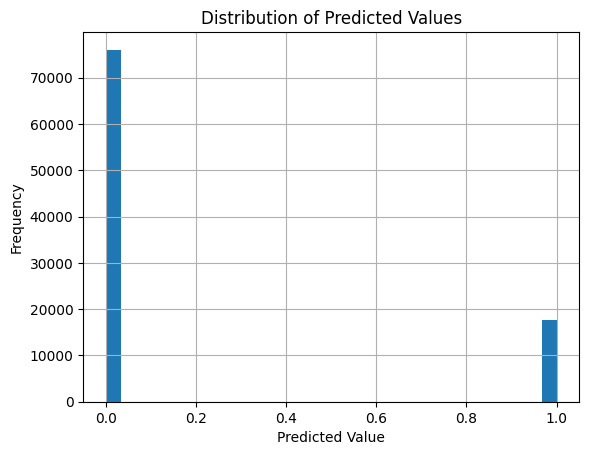

In [37]:
import matplotlib.pyplot as plt

# Histogram of predictions
predictions_df['predict'].hist(bins=30)
plt.title("Distribution of Predicted Values")
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.show()


# Submission

In [38]:
test_data = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")

In [40]:
test_data['id']

0        140700
1        140701
2        140702
3        140703
4        140704
          ...  
93795    234495
93796    234496
93797    234497
93798    234498
93799    234499
Name: id, Length: 93800, dtype: int64

In [46]:
# Rename 'predict' column to 'Depression'
predictions_df.rename(columns={'predict': 'Depression'}, inplace=True)

In [49]:
submission_df = pd.DataFrame({'id': test_data['id'],'Depression': predictions_df['Depression']})

In [50]:
# Save the combined DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [51]:
check = pd.read_csv('submission.csv')

In [52]:
check

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1
